<a href="https://colab.research.google.com/github/bhargavpetla/Bluetooth-module/blob/main/grahamscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

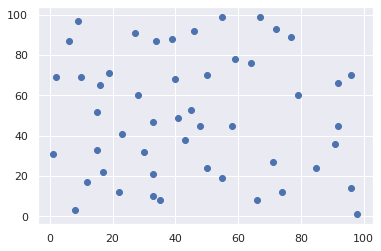

In [4]:
#create a random set of datapoints
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set()

number_of_datapoints = 50
datapoints = np.random.randint(1,100,size=(number_of_datapoints,2))
#plto the points on scatter plot
plt.scatter(datapoints[:,0], datapoints[:,1])

In [5]:
anchor_point = datapoints[0]
for _, point in enumerate(datapoints):
    if point[1] < anchor_point[1]:
        anchor_point = point
    elif point[1] == anchor_point[1] and point[0] < anchor_point[0]:
        anchor_point = point
print(anchor_point)

[98  1]


In [6]:
from math import atan2

def polar_angle(p0, p1):
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return atan2(y_span,x_span)

# find the angle
datapoints_angles = []
origin = [0,0]
for _, point in enumerate(datapoints):
    datapoints_angles.append([point[0],point[1], polar_angle(anchor_point, point)])

datapoints_angles = np.array(datapoints_angles)    
datapoints_angles = datapoints_angles[datapoints_angles[:,2].argsort()]
sorted_datapoints =  datapoints_angles[:,(0,1)]

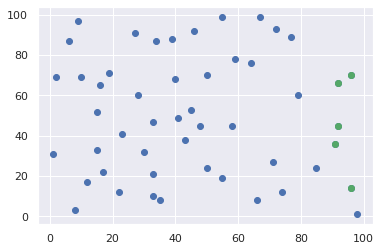

In [7]:
plt.scatter(datapoints[:,0], datapoints[:,1])
plt.scatter(sorted_datapoints[0:5,0], sorted_datapoints[0:5,1], c='g')

In [8]:
convex_hull = [anchor_point, sorted_datapoints[0]]

In [9]:
def ccw(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) - (c[0] - a[0]) * (b[1] - a[1])

for point in sorted_datapoints[1:]:
    while ccw(convex_hull[-2],convex_hull[-1], point)<=0:
        del convex_hull[-1] # backtrack
    convex_hull.append(point)

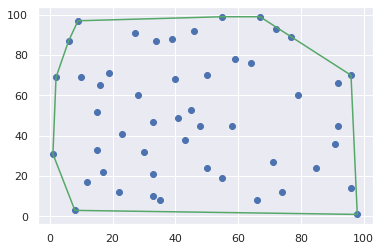

In [10]:
convex_hull = np.array(convex_hull)
plt.scatter(datapoints_angles[:,0], datapoints_angles[:,1])
plt.plot(convex_hull[:,0], convex_hull[:,1], c='g')